### 1 numpy和pytorch实现梯度下降法

In [1]:
import numpy as np

def gen_line_data(sample_num=100):
    """
    y = 3*x1 + 4*x2
    :return:
    """
    x1 = np.linspace(0, 9, sample_num)
    x2 = np.linspace(4, 13, sample_num)
    x = np.concatenate(([x1], [x2]), axis=0).T
    y = np.dot(x, np.array([3, 4]).T)  # y 列向量
    return x, y

def sgd(samples, y, step_size=0.01, max_iter_count=10000):
    """
    随机梯度下降法
    :param samples: 样本
    :param y: 结果value
    :param step_size: 每一接迭代的步长
    :param max_iter_count: 最大的迭代次数
    :param batch_size: 随机选取的相对于总样本的大小
    :return:
    """
    sample_num, dim = samples.shape
    y = y.flatten()
    w = np.ones((dim,), dtype=np.float32)
    loss = 10
    iter_count = 0
    while loss > 0.001 and iter_count < max_iter_count:
        loss = 0
        error = np.zeros((dim,), dtype=np.float32)
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            for j in range(dim):
                error[j] += (y[i] - predict_y) * samples[i][j]
                w[j] += step_size * error[j] / sample_num

        # for j in range(dim):
        #     w[j] += step_size * error[j] / sample_num

        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            error = (1 / (sample_num * dim)) * np.power((predict_y - y[i]), 2)
            loss += error

        print("iter_count: ", iter_count, "the loss:", loss)
        iter_count += 1
    return w

if __name__ == '__main__':
    samples, y = gen_line_data()
    w = sgd(samples, y)
    print(w)  # 会很接近[3, 4]

iter_count:  0 the loss: 238.1385315538224
iter_count:  1 the loss: 112.41457097082805
iter_count:  2 the loss: 36.892229492246095
iter_count:  3 the loss: 19.07143716706338
iter_count:  4 the loss: 5.744732833930403
iter_count:  5 the loss: 3.390809875579115
iter_count:  6 the loss: 0.923980092211449
iter_count:  7 the loss: 0.6502534538960436
iter_count:  8 the loss: 0.16393935963282183
iter_count:  9 the loss: 0.13916064409295986
iter_count:  10 the loss: 0.035528973666947045
iter_count:  11 the loss: 0.034058758504732584
iter_count:  12 the loss: 0.009922199521793358
iter_count:  13 the loss: 0.009519171980690053
iter_count:  14 the loss: 0.0033507832645485905
iter_count:  15 the loss: 0.00295931414123372
iter_count:  16 the loss: 0.0012375368143903178
iter_count:  17 the loss: 0.00098937887113691
[2.9675493 4.0159636]


In [2]:
import torch 
from torch.autograd import Variable
import numpy as np
N = 100
x = Variable(torch.randn(N,2))
w = Variable(torch.FloatTensor([2, -4]))
y = x*w

EPOCHS = 5000

lr = 0.01
w_GD = Variable(torch.FloatTensor([0, 0]), requires_grad=True)
cost = []
w_all = []
for i in range(EPOCHS):
    w_all.append(w_GD.data)
    y_predict = x*w_GD
    loss = torch.mean((y_predict-y)**2)

    cost.append(loss.data.numpy())
    loss.backward()
     #参数更新
    w_GD.data -= lr*w_GD.grad.data
    w_GD.grad.data.zero_()    
print("loss:",loss)
print("w_GD:",w_GD)

loss: tensor(9.4744e-11, grad_fn=<MeanBackward0>)
w_GD: tensor([ 2.0000, -4.0000], requires_grad=True)


### 2 线性回归

Epoch[1000/1000], loss: 0.557208


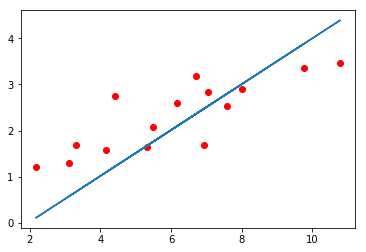

In [29]:
import torch 
from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import matplotlib.pyplot as plt

x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  #input and output is 1 dimension
        
    def forward(self,x):
        out = self.linear(x)
        return out
    
if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()
criterion = nn.MSELoss()  #使用均方误差函数
optimizer = optim.SGD(model.parameters(), lr=1e-3)
num_epochs = 1000
for epoch in range(num_epochs):
    if torch.cuda.is_available():
        inputs = Variable(x_train).cuda()
        target = Variable(y_train).cuda()
    else:
        inputs = Variable(x_train)
        target = Variable(y_train)
#forward
out = model(inputs)
loss = criterion(out, target)
#backward
optimizer.zero_grad()
loss.backward()
optimizer.step()

if(epoch+1) % 20 == 0:
    print('Epoch[{}/{}], loss: {:.6f}'.format(epoch+1, num_epochs, loss.item()))

model.eval()
predict = model(Variable(x_train).cuda())
predict = predict.data.cpu().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, label='Fitting Line')
plt.show()